In [1]:
V0 = -5.0
V(x) =  V0*exp(-x^2)

V (generic function with 1 method)

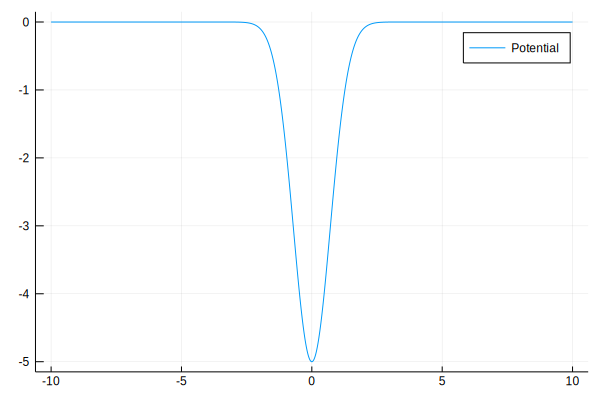

In [2]:
using Plots
N = 1000
xmax = 10.0
xmin = -10.0
xvec = range(xmin,stop=xmax,length=N)　#linspace➔rangeに変更
plot(xvec,V.(xvec),label="Potential")

In [3]:
function make_H1d(N,xmax,xmin,V)
    mat_H = zeros(Float64,N,N)
#    V(x) =  -V0*exp(-x^2/ξ^2)　ここはjuliaで量子力学を参照
    a = (xmax-xmin)/(N-1)
        
    for i in 1:N　　　#juliaで数値計算1　forは必ずfunctionでラップする。べた書きは✕
        x = (i-1)*a + xmin
        for dx in -1:1
            j = i + dx
            v = 0.0
            if dx == 0                
                v = (2/a^2 + V(x))
            elseif dx == 1
                v = -1/a^2
            elseif dx == -1
                v = -1/a^2
            end
            
            if 1 <= j <= N
                mat_H[i,j] = v
            end
            
        end
        
    end
    
    return mat_H
end

make_H1d (generic function with 1 method)

In [4]:
using LinearAlgebra
mat_H = make_H1d(N,xmax,xmin,V) 
energy,mat_v = eigen(mat_H) #eig➔eigenに変更
println(energy[1:10])

[-3.1404, -0.406214, 0.103394, 0.156328, 0.414593, 0.582229, 0.936374, 1.23551, 1.67118, 2.09897]


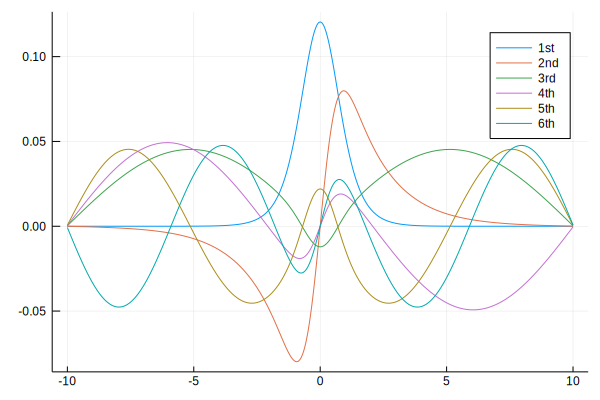

In [5]:
using Plots
plot(xvec,[mat_v[1:N,1:6]],label=["1st","2nd","3rd","4th","5th","6th"]) 
#=
１つ目の固有値に対応する固有ベクトルのすべての要素を書き下す。mat_vは1-10の固有値を列に並べている。
:は1:Nのように通常用いるが、何も書かなければすべて並べることに対応。mat_v[]の外側のカッコはいらない？
=#

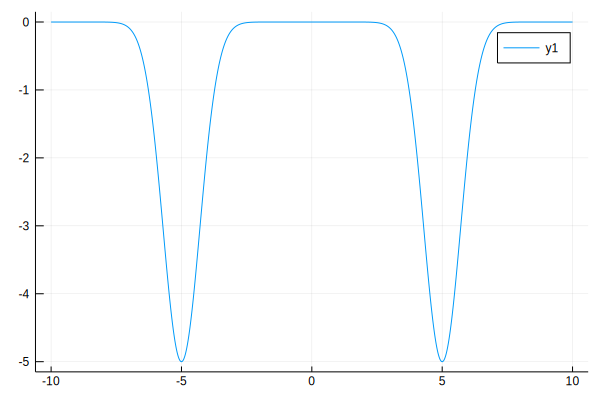

In [6]:
x0=5
V2(x)=V0*(exp(-(x-x0)^2)+exp(-(x+x0)^2))
plot(xvec,V2.(xvec))

In [7]:
mat_H2 = make_H1d(N,xmax,xmin,V2)
energy2p,mat_v2 = eigen(mat_H2)
println("ポテンシャル２つのときのエネルギー")
println(energy2p[1:10])
println("ポテンシャル１つのときのエネルギー")
println(energy[1:10])

ポテンシャル２つのときのエネルギー
[-3.1404, -3.1404, -0.406297, -0.399154, 0.166959, 0.437936, 0.618356, 0.878289, 1.31861, 1.78077]
ポテンシャル１つのときのエネルギー
[-3.1404, -0.406214, 0.103394, 0.156328, 0.414593, 0.582229, 0.936374, 1.23551, 1.67118, 2.09897]


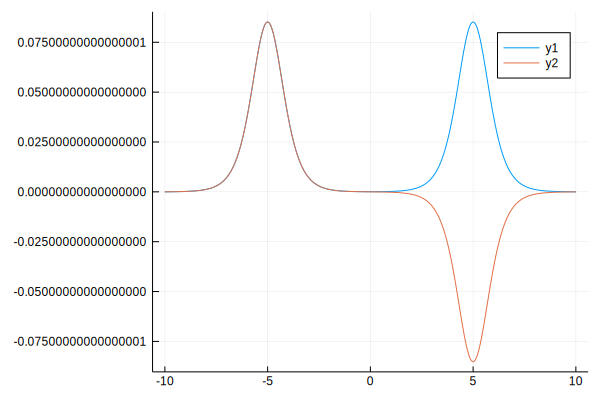

In [8]:
plot(xvec,mat_v2[:,1:2])

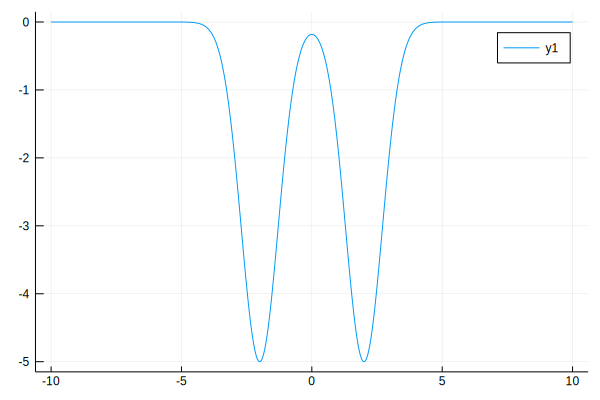

In [9]:
x0=2 #2でやってみた
V2(x)=V0*(exp(-(x-x0)^2)+exp(-(x+x0)^2))
plot(xvec,V2.(xvec))

[-3.15901, -3.12303, -0.545081, -0.20116, 0.199488, 0.268598, 0.684657, 0.889877, 1.34396, 1.74977]


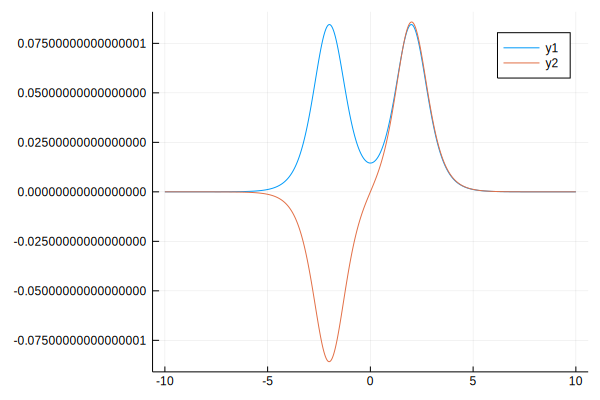

In [10]:
mat_H2=make_H1d(N,xmax,xmin,V2)
energy2p,mat_v2=eigen(mat_H2)
println(energy2p[1:10])
plot(xvec,mat_v2[:,1:2])

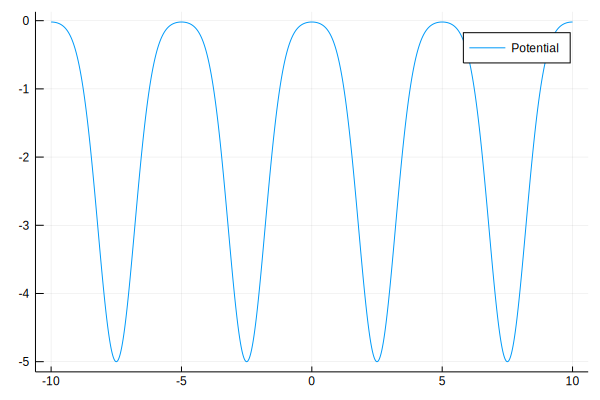

In [11]:
function Vp(x,V0,xmax,xmin,np)
    dx = (xmax-xmin)/(np-1)
    V3 = 0.0
    for i=1:np-1
        x0 = (i-1)*dx + xmin+dx/2
        V3 += V0*exp(-(x-x0)^2)+V0*exp(-(x-(xmax-xmin)-x0)^2)+V0*exp(-(x+(xmax-xmin)-x0)^2)
    end
    return V3
end

N = 2000
xmax = 10.0
xmin = -10.0

V3(x) =  Vp(x,V0,xmax,xmin,5)
plot(xvec,V3.(xvec),label="Potential")

In [12]:
function make_H1dp(N,xmax,xmin,V)
    mat_H=zeros(Float64,N,N)
    a=(xmax-xmin)/(N-1)
    
    for i=1:N
        x=xmin+a*(i-1)
        for dx=-1:1
            j=i+dx
            j+=ifelse(j>N,-N,0) #j>Nなら-Nを足す、そうでなければ0のまま
            j+=ifelse(j<1,+N,0) #j<1ならNを足す……
            
            v=0.0
            
            if dx==0
                v=2/a^2+V(x)
            elseif dx==1
                v=-1/a^2
            elseif dx==-1
                v=-1/a^2
            end
                
            if 1<=j<=N
                mat_H[i,j]=v
            end
        end 
    end 
    
    return mat_H
    
end

make_H1dp (generic function with 1 method)

[-3.14644, -3.14043, -3.14038, -3.13427, -0.543964, -0.396685, -0.396135, -0.143989, 0.493408, 1.01921]


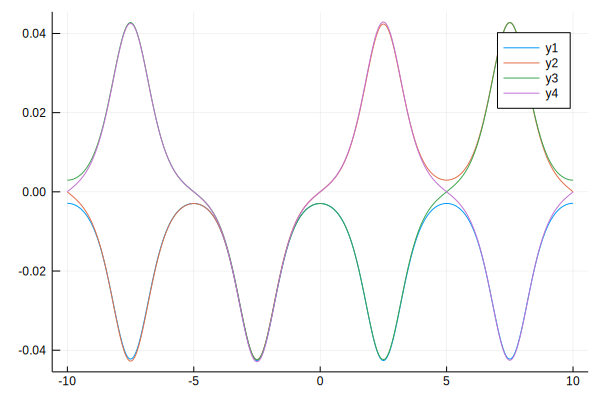

In [13]:
N=2000
xmin=-10.0
xmax=10.0
xvec = range(xmin,stop=xmax,length=N)
V3(x)=Vp(x,V0,xmax,xmin,5)
mat_H2=make_H1dp(N,xmax,xmin,V3)
energy4p,mat_v2=eigen(mat_H2)
println(energy4p[1:10])
plot(xvec,mat_v2[:,1:4])

-3.1404009040145286


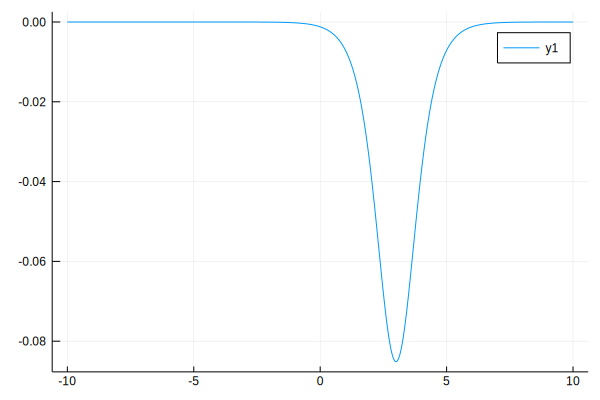

In [14]:
N=2000
xmax=10.0
xmin=-10.0
x0=3.0
xvec=range(xmin,stop=xmax,length=N)
V0=-5.0
V1(x)=V0*exp(-(x-x0)^2)
mat_H1=make_H1dp(N,xmax,xmin,V1)
energy1,mat_v1=eigen(mat_H1)
ψ1=mat_v1[:,1]
println(energy1[1])
using Plots
plot(xvec,ψ1)

-3.1404009040145286


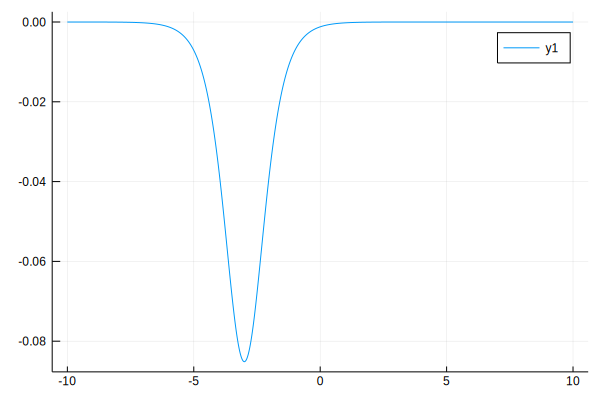

In [15]:
V2(x)=V0*exp(-(x+x0)^2)
mat_H2=make_H1dp(N,xmax,xmin,V2)
energy2,mat_v2=eigen(mat_H2)
ψ2=mat_v2[:,1]
println(energy2[1])
using Plots
plot(xvec,ψ2)

In [21]:
function calc_Htb(energy,ψ1,ψ2,vecV1,vecV2)
    
    mat_Htb=zeros(Float64,2,2)
    v1=0.0
    v2=0.0
    t1=0.0
    t2=0.0
    N=length(ψ1) #length は成分の総数
    
    for i=1:N
        v1 += vecV2[i]*ψ1[i]*ψ1[i]
        v2 += vecV1[i]*ψ2[i]*ψ2[i]
        t1 += ψ1[i]*ψ2[i]*(vecV1[i]+energy[1])  
        t2 += ψ2[i]*ψ1[i]*(vecV2[i]+energy[1])
        #=局在したポテンシャルと束縛状態の位置関係は1と2で対称なのでt1とt2、v1とv2は積分したら同じ値になる。
        積分の幅がかけられていないのは規格化してないから？
        =#
    end 
    
    mat_Htb[1,1] = energy[1]+v1
    mat_Htb[1,2] = t1
    mat_Htb[2,1] = t2
    mat_Htb[2,2] = energy[1]+v2
    
    return mat_Htb
    
end     

calc_Htb (generic function with 1 method)

In [22]:
N = 2000
xmax = 10.0
xmin = -10.0
vecV1 = zeros(Float64,N)
vecV2 = zeros(Float64,N)
dx = (xmax-xmin)/(N-1)
for i=1:N
    x = (i-1)*dx+xmin
    vecV1[i] = V1(x) 
    vecV2[i] = V2(x)
end
mat_Htb = calc_Htb(energy1,ψ1,ψ2,vecV1,vecV2)

2×2 Array{Float64,2}:
 -3.14035     -0.00306648
 -0.00306648  -3.14035   

In [30]:
ε,c=eigen(mat_Htb)
println(ε[2])
println(c[1:2,2])

-3.143417886160867
[0.707107, 0.707107]


In [35]:
function calc_Htb4(energy,ψ1,ψ2,vecV1,Nx)
    
    mat_Htb=zeros(Float64,Nx,Nx)
    
    t = 0.0
    v0 = 0.0
    N = length(ψ1)
    
    for i=1:N
        t+= ψ1[i]*ψ2[i]*(energy[1]+vecV1[i])
    end
    
    for i=1:Nx
        for dx=-1:1
            j=i+dx
            j+=ifelse(j>Nx,-Nx,0)
            j+=ifelse(j<1,Nx,0)
                
            if abs(dx)==0
                mat_Htb[i,j]=energy[1]
            elseif abs(dx)==1
                mat_Htb[i,j]=t
            end  
        end
    end
    return mat_Htb
end

calc_Htb4 (generic function with 1 method)

In [38]:
N = 2000
xmax = 10.0
xmin = -10.0
vecV1 = zeros(Float64,N)
dx = (xmax-xmin)/(N-1)
for i=1:N
    x = (i-1)*dx+xmin
    vecV1[i] = V1(x) 
end
mat_Htb = calc_Htb4(energy1,ψ1,ψ2,vecV1,4)

4×4 Array{Float64,2}:
 -3.14035     -0.00306648   0.0         -0.00306648
 -0.00306648  -3.14035     -0.00306648   0.0       
  0.0         -0.00306648  -3.14035     -0.00306648
 -0.00306648   0.0         -0.00306648  -3.14035   

In [45]:
ε,c=eigen(mat_Htb)
println(ε[1])
println(c[:,1])

-3.1464836386511257
[-0.5, -0.5, -0.5, -0.5]
